In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier   
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_score, recall_score, f1_score, make_scorer
)
sns.set_style('whitegrid')

In [63]:
#importing data csv file
card_data = pd.read_csv('/Users/gautamparmar/Desktop/AIRepositories/ML Project/Credit Card Fraud/creditcard.csv')

In [64]:
#printing the 1st 5rows of the card dataset
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Printing last 5 rows from the data

In [65]:
card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


There are about 2,84,06 dataset which is a huge amount of data and this data is highly imbalanced!!

In [66]:
#fetching data information
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here Float64 and int64 are the data types and the "non-null" specifies that there are no "null" values or in other words there are no "empty" values present in our data. To also verify this now in the next step, we are going to check missing values in each coloumn.

In [67]:
card_data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we can see there are no missing values in our data, however, if there wpuld have bee n any missing values in our data we would have used "imputation" method to give meaningfull numbers to our data. 

In [68]:
#lets check distribution of legit transaction & fraudulent transactions
card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Here we can see datapoints for legit data is 2,84,315 and for fraudulent cases we only have 492 data points.

0 ---> Normal Transaction (Legit)
1 ---> Fraudulent Transaction

So, if we feed this data to our machine learning model it is not going to work as it will think that the new data is legit data and it will not work accurately.

This comprises that out dataset is Highly Imbalanced

Before Pre Processing this data, lets do a little bit of extra data analysis

In [69]:
#separating the data for analysis
legit = card_data[card_data.Class == 0]
fraud = card_data[card_data.Class == 1]

In [70]:
print(card_data['Class'].dtype)


int64


In [71]:
#checking datapoints present in each variable i.e legit and fraud
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [72]:
#getting statstical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [73]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Now lets compare the value of both type of transactions, basically getting the mean for all the coloumns for fraud and legit transaction.

In [74]:
card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now lets start pre processing the imbalanced data using Under- Samapling Technique

UNDERSAMPLING 

Creating a sample dataset contaning similar distribution of legit transactions and Fraud transactions

Amount of Fraudulent Transactions ----> 492
Amount of Legit Transactions -----> 2,84,315

Now, we need to match the amount of datapoint each transaction have, so we are going to create a sample dataset for Legit Transactions of 492 datapoints and then concatinate both fraudukent transactions data and legit transaction data.


In [75]:
legit_sample = legit.sample(n=492) #taking 492 datapoints out of 284315

Concatinating Both Data Frames

In [76]:
con_dataset = pd.concat([legit_sample, fraud], axis=0) #concatinating

Checking New Dataset Values

In [77]:
con_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141455,84335.0,-0.016454,0.506064,1.977000,0.978975,-0.262720,0.257863,0.223543,-0.156298,0.157469,...,0.114573,0.800040,-0.236812,-0.008386,-0.460901,0.774742,0.011129,-0.064733,20.00,0
217107,140765.0,-1.311079,0.456069,0.115214,3.616155,0.300077,0.779515,1.481706,0.453646,-2.429706,...,0.177583,-0.308240,0.715115,-0.479266,-0.507063,-0.174112,-0.050753,0.070837,311.22,0
134880,81009.0,-0.578390,1.374359,0.354805,-0.230043,0.431813,-0.233641,0.337455,0.426485,-0.514710,...,-0.310791,-0.931653,-0.140599,-1.060022,0.060507,0.160117,0.121242,0.021704,1.98,0
163779,116203.0,-0.207346,1.301172,-0.871001,-0.709907,0.916433,-0.348823,0.561759,0.433841,-0.591591,...,-0.261057,-0.721824,0.079591,0.201593,-0.348853,0.115994,0.099472,0.009552,1.98,0
169746,119837.0,2.005203,-0.197792,-1.035941,0.324613,-0.209116,-0.883251,-0.019102,-0.094402,0.468737,...,-0.241369,-0.652034,0.361015,-0.017209,-0.397889,0.182754,-0.079495,-0.072713,0.99,0


In [78]:
con_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [79]:
con_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

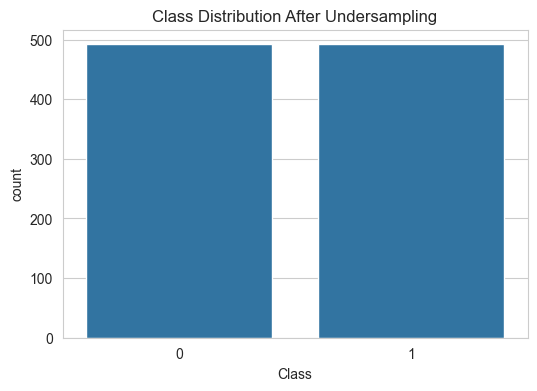

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=con_dataset)
plt.title("Class Distribution After Undersampling")
plt.show()


Now we have uniformly distributed data

Legit Transactions ---> 492
Fraud Transactions ---> 492

In [81]:
con_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,99865.207317,0.213536,-0.065544,0.042036,-0.023197,-0.108103,-0.072225,0.004298,0.021581,0.008696,...,-0.005124,0.014088,0.027735,0.002536,-0.001966,-0.034066,0.017433,0.010970,-0.005949,90.394085
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


So we can see by checking mean that there is not much difference in mean which means that the nature of the dataset is not changed hence, the difference is still there, in this step we checked wether we got good sample or bad sample after concatinating

Splitting the Data into Features and Targets 

In [82]:
F = con_dataset.drop(columns='Class', axis=1) #dropping class coloumn
T = con_dataset['Class'] #storing class

In [83]:
print(F)

            Time        V1        V2        V3        V4        V5        V6  \
141455   84335.0 -0.016454  0.506064  1.977000  0.978975 -0.262720  0.257863   
217107  140765.0 -1.311079  0.456069  0.115214  3.616155  0.300077  0.779515   
134880   81009.0 -0.578390  1.374359  0.354805 -0.230043  0.431813 -0.233641   
163779  116203.0 -0.207346  1.301172 -0.871001 -0.709907  0.916433 -0.348823   
169746  119837.0  2.005203 -0.197792 -1.035941  0.324613 -0.209116 -0.883251   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [84]:
print(T)

141455    0
217107    0
134880    0
163779    0
169746    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Train-Test Split 

Splitting the Data into Training and Testing data - We are now further splitting the data to test and train our model.

In [85]:
scoring = {
    'Accuracy': 'accuracy',
    'Precision': make_scorer(precision_score, pos_label=1),
    'Recall': make_scorer(recall_score, pos_label=1),
    'F1 Score': 'f1',
    'ROC AUC': 'roc_auc'
}

# Define the cross-validation strategy (5 folds)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [86]:
F_train, F_test, T_train, T_test = train_test_split(F,T, test_size=0.2, stratify=T, random_state=2)

In [87]:
print("F shape Data Points:", F.shape)
print("F_train Data points:", F_train.shape, "F_test Data Points:", F_test.shape)
print("T_train distribution:\n", T_train.value_counts())

F shape Data Points: (984, 30)
F_train Data points: (787, 30) F_test Data Points: (197, 30)
T_train distribution:
 Class
1    394
0    393
Name: count, dtype: int64


Creating a helper function - Confusion Matrix to show Actual and Predicted Data Points

In [88]:
def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


Logistic Regression - Model (It is good for Binary Classification)

In [89]:
model1 = LogisticRegression(random_state=2, solver='liblinear')
lr_scores = {}

print("\n--- Evaluating Logistic Regression with 5-Fold Cross-Validation ---")
for metric_name, scorer in scoring.items():
    # Perform cross-validation
    scores = cross_val_score(model1, F, T, cv=cv_strategy, scoring=scorer, n_jobs=-1)
    
    # Store the mean score
    mean_score = scores.mean()
    std_dev = scores.std() * 2
    lr_scores[metric_name] = mean_score
    
    print(f"  {metric_name}: {mean_score:.4f} (+/- {std_dev:.4f})")


--- Evaluating Logistic Regression with 5-Fold Cross-Validation ---
  Accuracy: 0.9370 (+/- 0.0228)
  Precision: 0.9741 (+/- 0.0306)
  Recall: 0.8984 (+/- 0.0523)
  F1 Score: 0.9344 (+/- 0.0251)
  ROC AUC: 0.9738 (+/- 0.0186)


In [90]:
print("First Model: Logistic Regression")
model1 = LogisticRegression()

First Model: Logistic Regression


Now lets train our Model1 with Training Data

In [91]:
#Traininga
model1.fit(F_train, T_train)

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluation - Now We will find the accuracy score of our model

Accuracy Score of Model1 (Logistic Regression)

In [92]:
#accuracy on training data
F_train_prediction = model1.predict(F_train)
training_data_accuracy = accuracy_score(F_train_prediction, T_train)

In [93]:
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.9479034307496823


In [94]:
#checking accuracy on TEST DATA
F_test_prediction = model1.predict(F_test)
test_data_accuracy = accuracy_score(F_test_prediction, T_test)

In [95]:
print('Accuracy Score on Test Data  :', test_data_accuracy)

Accuracy Score on Test Data  : 0.9390862944162437


If we get a higher ACCURACY SCORE difference in TEST and TRAIN data that means our model is either overfitted or underfitted

In [96]:
print("\nClassification report (Logistic Regression):\n")
print(classification_report(T_test, F_test_prediction))


Classification report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



Now here we are plotting the Confusion Matrix for the above data

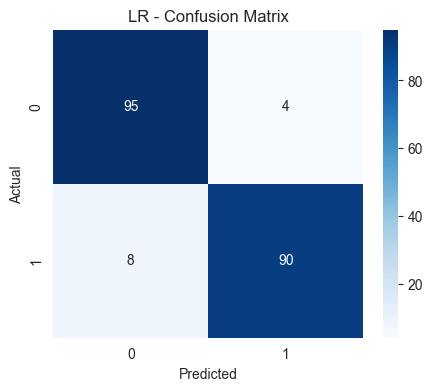

In [97]:
plot_conf_matrix(T_test, F_test_prediction, "LR - Confusion Matrix")

Now we will be plotting the ROC curve and also calculating AUC for Logistic Regression Model

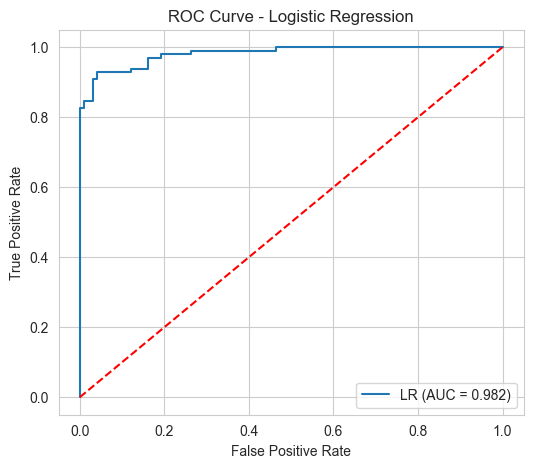

In [98]:
probs_lr = model1.predict_proba(F_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(T_test, probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC = {auc_lr:.3f})")
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Now we need to store this data for later comparison

In [99]:
lr_metrics = {
    "model": "Logistic Regression",
    "accuracy": accuracy_score(T_test, F_test_prediction),
    "precision": precision_score(T_test, F_test_prediction),
    "recall": recall_score(T_test, F_test_prediction),
    "f1": f1_score(T_test, F_test_prediction),
    "auc": auc_lr
}

Now we will test another model that is Random Forest for same dataset

In [100]:
model2 = RandomForestClassifier( n_estimators=200, random_state=2, class_weight='balanced')

In [101]:
model2.fit(F_train, T_train)
pred_rf = model2.predict(F_test)

In [102]:
print("Accuracy of Training Data:", accuracy_score(T_train, model2.predict(F_train)))
print("Accuracy of Test Data:", accuracy_score(T_test, pred_rf))
print("\nClassification report (Random Forest):\n")
print(classification_report(T_test, pred_rf))

Accuracy of Training Data: 1.0
Accuracy of Test Data: 0.9187817258883249

Classification report (Random Forest):

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



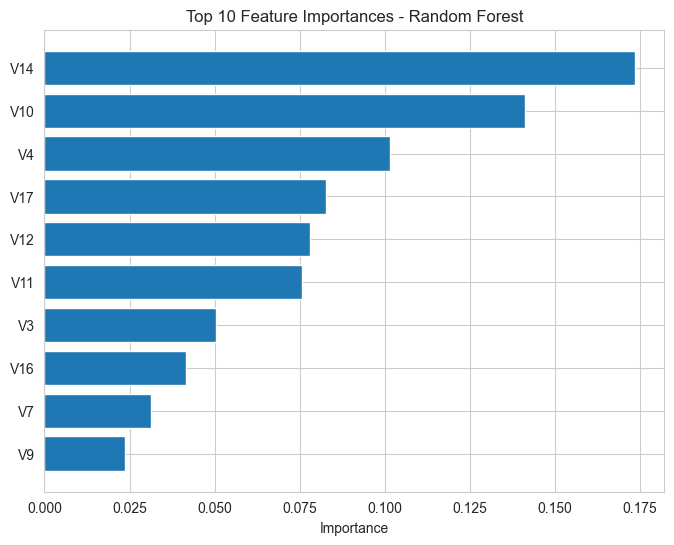

In [103]:
importances = model2.feature_importances_
indices = np.argsort(importances)[-10:]  

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [F.columns[i] for i in indices])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.show()

Now Let's plot Confusion Matrix for the Random Forest Model

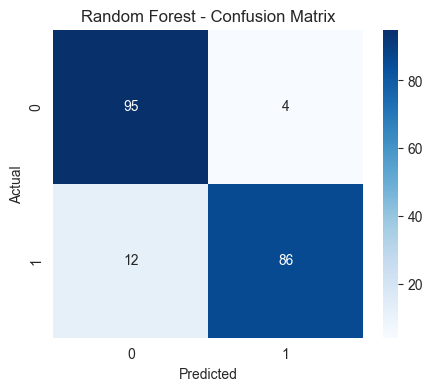

In [104]:
plot_conf_matrix(T_test, pred_rf, "Random Forest - Confusion Matrix")

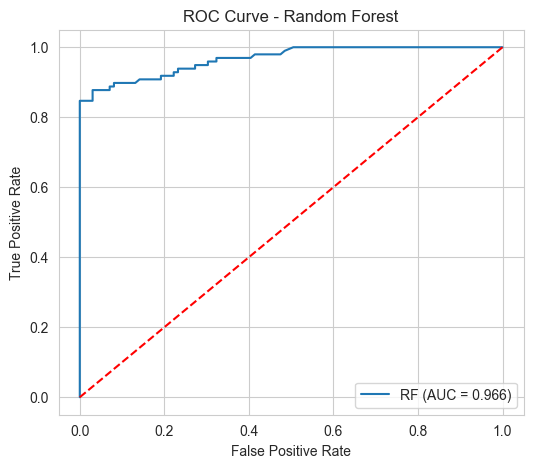

In [105]:
probs_rf = model2.predict_proba(F_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(T_test, probs_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {auc_rf:.3f})")
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Now, we are going to store the data for further evaluation and comparison between three models

In [106]:
rf_metrics = {
    "model": "Random Forest",
    "accuracy": accuracy_score(T_test, pred_rf),
    "precision": precision_score(T_test, pred_rf),
    "recall": recall_score(T_test, pred_rf),
    "f1": f1_score(T_test, pred_rf),
    "auc": auc_rf
}

Moving on to our third model SVM (Support Vector Machine)

Here we are using probability=True (so ROC is possible).

In [107]:
model3= SVC(kernel='rbf', probability=True, random_state=2)


In [108]:
model3.fit(F_train, T_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [109]:
pred_svm = model3.predict(F_test)


In [110]:
print("Accuracy on Training Data:", accuracy_score(T_train, model3.predict(F_train)))
print("Accuracy on Test Data:", accuracy_score(T_test, pred_svm))
print("\nClassification report (SVM):\n")
print(classification_report(T_test, pred_svm))

Accuracy on Training Data: 0.5603557814485387
Accuracy on Test Data: 0.5431472081218274

Classification report (SVM):

              precision    recall  f1-score   support

           0       0.55      0.52      0.53        99
           1       0.54      0.57      0.55        98

    accuracy                           0.54       197
   macro avg       0.54      0.54      0.54       197
weighted avg       0.54      0.54      0.54       197



Plotting Confusion Matrix for Above Data

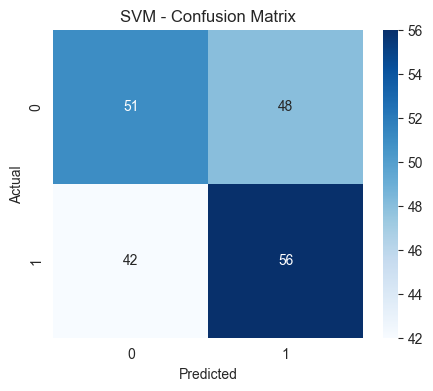

In [111]:
plot_conf_matrix(T_test, pred_svm, "SVM - Confusion Matrix")


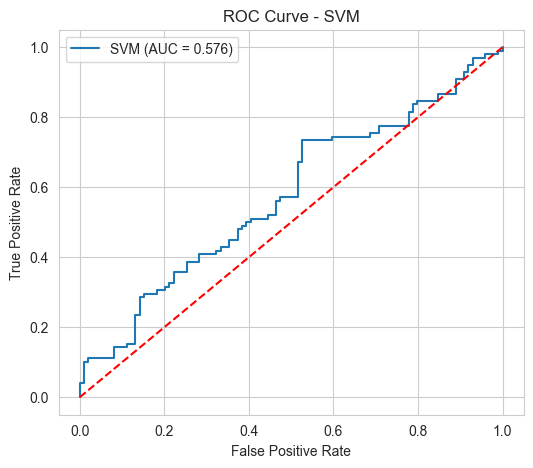

In [112]:
probs_svm = model3.predict_proba(F_test)[:,1]
fpr_svm, tpr_svm, _ = roc_curve(T_test, probs_svm)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(6,5))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.3f})")
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Storing data for later comparison

In [113]:
svm_metrics = {
    "model": "SVM",
    "accuracy": accuracy_score(T_test, pred_svm),
    "precision": precision_score(T_test, pred_svm),
    "recall": recall_score(T_test, pred_svm),
    "f1": f1_score(T_test, pred_svm),
    "auc": auc_svm
}

As we have now trained our three models i.e, Model 1: Logistic Regression | Model 2: Random Forest | Model 3: SVM
now, we need to compare: Accuracy, Precision, Recall, F1 and Auc from all three model to find out the best model for Heart Diseases Prediction.

so now lets compare all the Three Models and find out Best

Lets first Project the datapoints for each label i.e, Legit And Fraud

Combined dataset shape: (984, 31)
Class
0    492
1    492
Name: count, dtype: int64


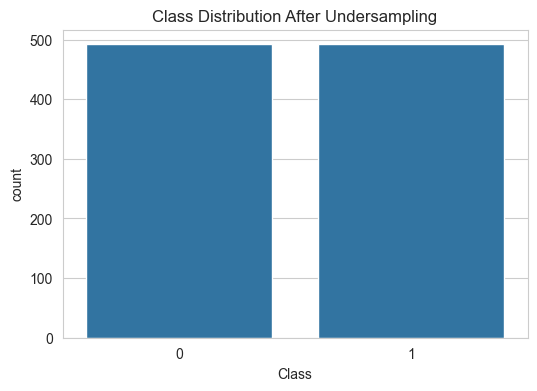

In [114]:
print("Combined dataset shape:", con_dataset.shape)
print(con_dataset['Class'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=con_dataset)
plt.title("Class Distribution After Undersampling")
plt.show()

In [115]:
F = con_dataset.drop(columns='Class', axis=1)
T = con_dataset['Class']
F_train, F_test, T_train, T_test = train_test_split(F, T, test_size=0.2, stratify=T, random_state=2)
print("Number of Train/test shapes:", F_train.shape, F_test.shape)

Number of Train/test shapes: (787, 30) (197, 30)



Model Comparison
                  Model  accuracy  precision    recall        f1       auc
0  Logistic Regression  0.939086   0.957447  0.918367  0.937500  0.981550
1        Random Forest  0.918782   0.955556  0.877551  0.914894  0.966244
2                  SVM  0.543147   0.538462  0.571429  0.554455  0.575758


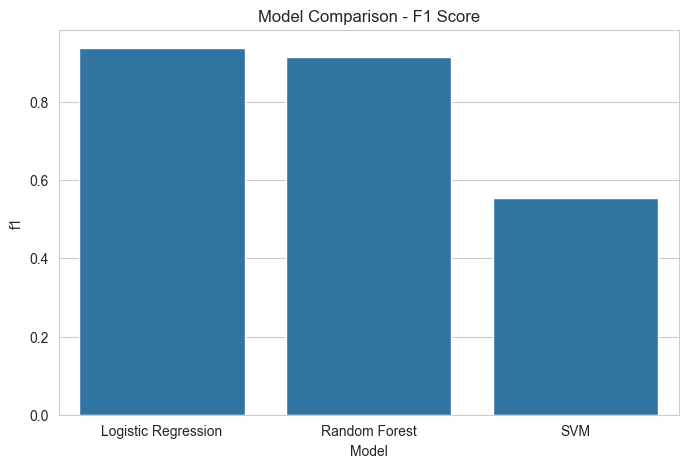

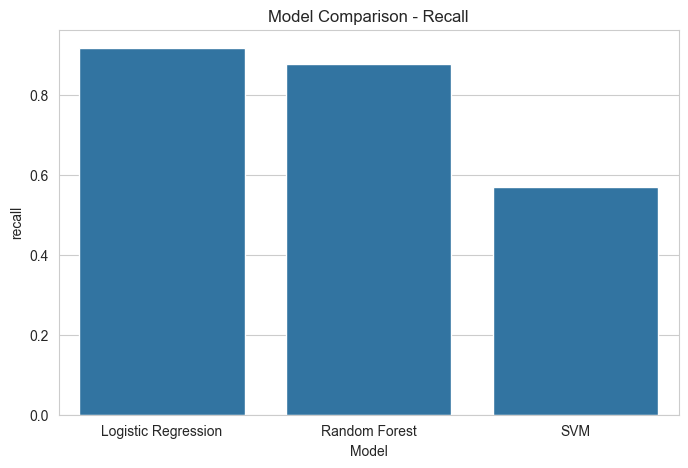

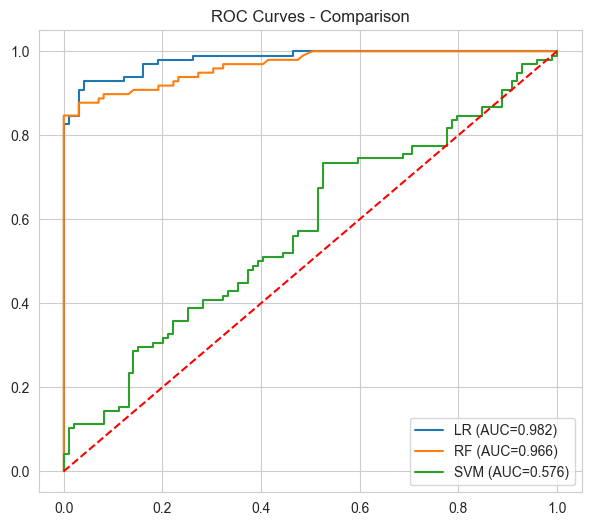


Best model by F1 score: Logistic Regression
Model        Logistic Regression
accuracy                0.939086
precision               0.957447
recall                  0.918367
f1                        0.9375
auc                      0.98155
Name: 0, dtype: object


In [116]:
results = pd.DataFrame([lr_metrics, rf_metrics, svm_metrics])[['model','accuracy','precision','recall','f1','auc']].rename(columns={'model':'Model'})
print("\nModel Comparison\n", results)
plt.figure(figsize=(8,5)); sns.barplot(x='Model', y='f1', data=results); plt.title("Model Comparison - F1 Score"); plt.show()
plt.figure(figsize=(8,5)); sns.barplot(x='Model', y='recall', data=results); plt.title("Model Comparison - Recall"); plt.show()
plt.figure(figsize=(7,6))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={auc_rf:.3f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.3f})")
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curves - Comparison")
plt.legend(); plt.show()
best_idx = results['f1'].idxmax()
print("\nBest model by F1 score:", results.loc[best_idx,'Model'])
print(results.loc[best_idx])

Misclasffications from Each Model

In [117]:
# --- Creating a MISCLASSIFICATION EXTRACTION FUNCTION ---

def get_misclassifications(X_test, y_test, y_pred):
    """
    Returns DataFrame of rows where model prediction != actual class.
    """
    misclassified_idx = np.where(y_test != y_pred)[0]   # indexes where model was wrong
    mis_df = X_test.iloc[misclassified_idx].copy()
    mis_df['Actual'] = y_test.iloc[misclassified_idx].values
    mis_df['Predicted'] = y_pred[misclassified_idx]
    return mis_df


Logistic Regression MisClassification

In [118]:
mis_lr = get_misclassifications(F_test, T_test, F_test_prediction)
print("Logistic Regression (Model 1) Misclassifications")
print(mis_lr.head())
print("Total Misclassified by LR:", len(mis_lr))

Logistic Regression (Model 1) Misclassifications
            Time        V1        V2        V3        V4        V5        V6  \
10498    17230.0 -0.469327  1.111453  2.041003  1.731595  0.135147 -0.093625   
175346  122291.0  1.859463  1.096857 -1.740245  3.993304  1.152832 -0.224708   
151103   94625.0  1.707857  0.024881 -0.488140  3.787548  1.139451  2.914673   
191074  129095.0 -1.836940 -1.646764 -3.381168  0.473354  0.074243 -0.446751   
157585  110087.0  1.934946  0.650678 -0.286957  3.987828  0.316052 -0.099449   

              V7        V8        V9  ...       V22       V23       V24  \
10498   0.266155  0.082988  0.580255  ...  0.592670 -0.053596  0.320748   
175346  0.351389  0.014843 -1.308698  ... -1.128893  0.261331 -0.717867   
151103 -0.743358  0.699136  1.008471  ...  0.548258  0.091218 -1.007959   
191074  3.791907 -1.351045  0.095186  ...  1.786681 -0.151178 -0.582098   
157585 -0.021483 -0.172327  0.508730  ... -0.190974  0.219976 -0.216597   

             V25   

Misclassification by Random Forest Model

In [119]:
mis_rf = get_misclassifications(F_test, T_test, pred_rf)
print("Random Forest (Model 2) Misclassifications")
print(mis_rf.head())
print("Total Misclassified by RF:", len(mis_rf))


Random Forest (Model 2) Misclassifications
            Time        V1        V2        V3        V4        V5        V6  \
52521    45501.0  1.001992  0.047938 -0.349002  1.493958  0.186939  0.190966   
79874    58217.0 -0.443794  1.271395  1.206178  0.790371  0.418935 -0.848376   
10498    17230.0 -0.469327  1.111453  2.041003  1.731595  0.135147 -0.093625   
175346  122291.0  1.859463  1.096857 -1.740245  3.993304  1.152832 -0.224708   
151103   94625.0  1.707857  0.024881 -0.488140  3.787548  1.139451  2.914673   

              V7        V8        V9  ...       V22       V23       V24  \
52521  -0.001112  0.147140  0.580415  ... -1.014315 -0.128427 -0.946242   
79874   0.917691 -0.235511 -0.285692  ...  0.513479 -0.264243  0.443311   
10498   0.266155  0.082988  0.580255  ...  0.592670 -0.053596  0.320748   
175346  0.351389  0.014843 -1.308698  ... -1.128893  0.261331 -0.717867   
151103 -0.743358  0.699136  1.008471  ...  0.548258  0.091218 -1.007959   

             V25       V2

Misclassification by SVM

In [120]:
mis_svm = get_misclassifications(F_test, T_test, pred_svm)
print("SVM (Model 3)Misclassifications")
print(mis_svm.head())
print("Total Misclassified by SVM:", len(mis_svm))


SVM (Model 3)Misclassifications
            Time        V1        V2        V3        V4        V5        V6  \
247995  153761.0  1.146259  1.403458 -4.159148  2.660107 -0.323217 -1.836071   
87498    61713.0 -6.807329  5.623247 -5.063439 -1.773363 -3.361381 -0.225388   
39341    39800.0  1.124541 -0.188662 -1.399071  0.013798  2.168166  3.324018   
58120    48239.0  1.198893 -0.619934 -0.112507 -0.510700 -0.722206 -0.536922   
109769   71531.0 -1.656403 -2.348201  0.807798 -1.957895 -0.289665 -1.471511   

              V7        V8        V9  ...       V22       V23       V24  \
247995 -1.623740  0.259562 -1.132044  ...  0.445744 -0.141136 -0.265517   
87498  -4.226086  5.682577 -0.864100  ... -0.457731  0.559185 -1.677033   
39341  -0.240089  0.740814 -0.164017  ... -0.223665 -0.215087  1.008665   
58120  -0.432245 -0.070609 -0.916865  ... -0.178512 -0.146333 -0.064072   
109769  0.390047 -0.153576 -2.960085  ... -0.829232  1.050678  0.424574   

             V25       V26       V27

Number of False Negatives 'Fraud' Missed

In [121]:
def get_false_negatives(X_test, y_test, y_pred):
    
    fn_idx = np.where((y_test == 1) & (y_pred == 0))[0]
    fn_df = X_test.iloc[fn_idx].copy()
    fn_df["Actual"] = 1
    fn_df["Predicted"] = 0
    return fn_df

print("LR False Negatives:", len(get_false_negatives(F_test, T_test, F_test_prediction)))
print("RF False Negatives:", len(get_false_negatives(F_test, T_test, pred_rf)))
print("SVM False Negatives:", len(get_false_negatives(F_test, T_test, pred_svm)))


LR False Negatives: 8
RF False Negatives: 12
SVM False Negatives: 42


Prediction Model Final

In [122]:
input_data = (71,1.33189715687662,-0.579961843235092,0.422605531843814,-0.897751526178555,-0.746254209764005,-0.05627323061712,-0.750316963446238,0.128483933549462,-0.964681778278345,0.736391419205694,1.39098159162914,-0.00804887228869112,-0.129421819641027,0.09427715103611,0.38881917965614,1.23661879113318,0.151535043141521,-1.39899032228073,0.672575069400762,0.0524891008907033,-0.0390703365042161,-0.255173945137789,0.109332682808613,-0.328448170015124,0.162253656210345,-0.447275874501086,0.0200705521150087,0.00623054348625991,14.48)

#changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('It is a Normal/Legit Transaction')
else:
    print('⚠️ FRAUDULENT TRANSACTION DETECTED! ')

[0]
It is a Normal/Legit Transaction


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
